---
# <font color="#CA3532">IPCV Part III miniproject</font>
---

Last updated on 2022-04-21


---

*SESSION 1: *

- This assingment uses [Keras](https://keras.io/)

- Keras is an open-source neural-network library. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

- Keras itself can work using different motors. We will use it with TensorFlow under the hood.

- We will analyze the vanishing gradient problem and initialization methods together with other optimization methods.


In [ ]:
student_data = [{'name': 'Gupta, Kush', 'nia': 'e470166'},
                {'name': 'Németh, Sebestyén', 'nia': 'e470170'}]

### <font color="#CA3532">Import the libraries</font>

TensorFlow officially included Keras, so if you have TensorFlow, you have keras!

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from time import time

In [ ]:
!rm -r DLFBT-LAB
!git clone https://github.com/luisferuam/DLFBT-LAB
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

rm: cannot remove 'DLFBT-LAB': No such file or directory
Cloning into 'DLFBT-LAB'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 122 (delta 61), reused 68 (delta 23), pack-reused 0
Receiving objects: 100% (122/122), 6.39 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (61/61), done.


### <font color="#CA3532">Data set</font>


In [ ]:
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
# Details https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names

dataset = np.loadtxt(dataset_url, delimiter=',')

# Split database in atributtes and classes
print(dataset)

#-------------------------------------------------------------------------------
# TO-DO block: Divide attributes and classes/labels. Store the numer of atrributes
#-------------------------------------------------------------------------------

x = dataset[:, 0:5]
y = dataset[:, -1]

x_size = x.shape[1]

print(x.shape)
print(y.shape)
print(x_size)

#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

[[ 1.24   0.875 -0.205 -0.078  0.067  0.   ]
 [ 0.268  1.352  1.035 -0.332  0.217  0.   ]
 [ 1.567  0.867  1.3    1.041  0.559  0.   ]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671  1.   ]
 [ 0.15   0.933  2.363 -0.742 -0.617  0.   ]
 [ 0.137  0.714  1.35   0.972 -0.63   1.   ]]
(5404, 5)
(5404,)
5


In [ ]:
# Final result with the classes stored in y
print(x_size)
print(x)
print(y)

5
[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]
[0. 0. 0. ... 1. 0. 1.]


In [ ]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

### <font color="#CA3532">Defining our model</font>

- From the input to the output in keras we can define the properties of each laye (size, activation function, connectivity topology...) with the sequential mode.

- In this case we are going to create our basic multilayer feedforward network



In [ ]:
# Define the model using keras
# nn = Sequential()

#-------------------------------------------------------------------------------
# TO-DO block: Add fully connected layers to create a MLP
#-------------------------------------------------------------------------------

# nn.add(tf.keras.Input(shape=(x_size,)))
# nn.add(tf.keras.layers.Dense(8))
# nn.add(tf.keras.layers.Dense(4))
# nn.add(tf.keras.layers.Dense(1))

#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

In [ ]:
# Large model
nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(x_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

### <font color="#CA3532">Compile the network</font>

- Compile is the step where our network is created

- Here we have to define different aspects involved in the trainning of the network

- In each section you have an URL to the official documentation. Take a look at the availability of different strategies in each case.

- It is possible to also define your own functions for this.

### <font color="#CA3532"> Optimizer </font>

Strategy to calculate the weights corrections

https://keras.io/api/optimizers/


### <font color="#CA3532"> Loss function </font>

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

https://keras.io/api/losses/

### <font color="#CA3532"> Metrics (results) </font>

A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

https://keras.io/api/metrics/


### <font color="#CA3532"> Initialization </font>

Initializers define the way to set the initial weights weights of your network layers.

https://keras.io/api/layers/initializers/



In [ ]:
# Compile

#-------------------------------------------------------------------------------
# TO-DO block: Compile your network
#-------------------------------------------------------------------------------

nn.compile(optimizer="Adam", loss="mse", metrics=["accuracy"]) # , metrics=["mae", "acc"]

#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

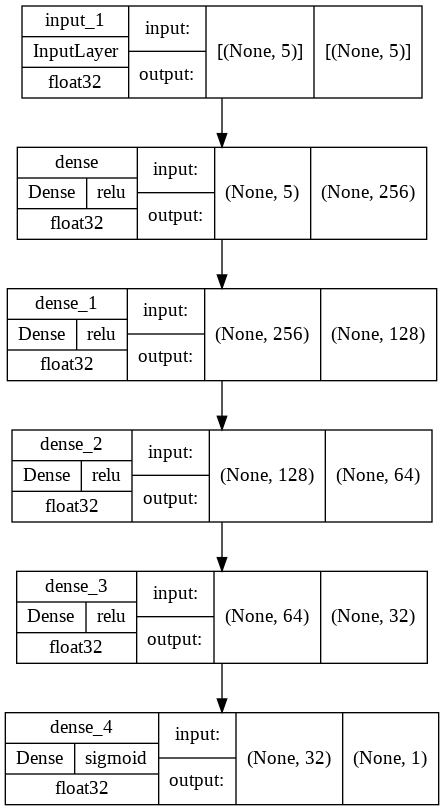

In [ ]:
tf.keras.utils.plot_model(
    nn, 
    show_layer_activations=True, 
    show_shapes=True,
    show_dtype=True)

### <font color="#CA3532">Train the network</font>

The Fit method trains the network according to the data.

Here we introduce all the data together and select a 20% of the data for validation purposes.

Other ways to do this are allowed, including the optimization of the parameters.

https://keras.io/api/models/model_training_apis/#fit-method

In [ ]:
# Fit

history = nn.fit(x, y, epochs=200, verbose=1, validation_split=0.2)

# Fit
# history = nn.fit(x, y, epochs=500, verbose=0, validation_split=0.2)

Epoch 1/200
136/136 [==============================] - 5s 6ms/step - loss: 0.1425 - accuracy: 0.7888 - val_loss: 0.1310 - val_accuracy: 0.8094
Epoch 2/200
136/136 [==============================] - 1s 5ms/step - loss: 0.1203 - accuracy: 0.8182 - val_loss: 0.1135 - val_accuracy: 0.8335
Epoch 3/200
136/136 [==============================] - 1s 5ms/step - loss: 0.1150 - accuracy: 0.8279 - val_loss: 0.1114 - val_accuracy: 0.8381
Epoch 4/200
136/136 [==============================] - 1s 5ms/step - loss: 0.1106 - accuracy: 0.8422 - val_loss: 0.1141 - val_accuracy: 0.8289
Epoch 5/200
136/136 [==============================] - 1s 5ms/step - loss: 0.1051 - accuracy: 0.8466 - val_loss: 0.1093 - val_accuracy: 0.8400
Epoch 6/200
136/136 [==============================] - 1s 5ms/step - loss: 0.1042 - accuracy: 0.8520 - val_loss: 0.1013 - val_accuracy: 0.8501
Epoch 7/200
136/136 [==============================] - 1s 5ms/step - loss: 0.1007 - accuracy: 0.8587 - val_loss: 0.1030 - val_accuracy: 0.8381

In [ ]:
# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just considering 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# Also, the predict method is available to classify unlabeled data

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



169/169 [==============================] - 1s 6ms

### <font color="#CA3532">Plot data</font>

- History object saves the different epoch data

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


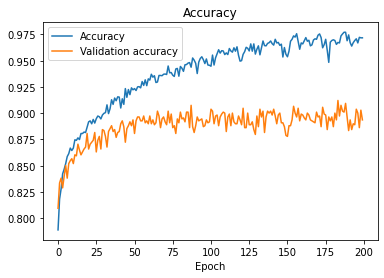

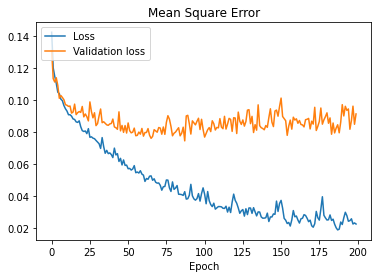

In [ ]:
# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

```
#-------------------------------------------------------------------------------
# TO-DO block: Explain what you observe
#-------------------------------------------------------------------------------
# Using a small number of neurons in the hidden layer (~= input layer)
```
Training for 4 epochs, our small model (5-8-4-1) acheieved a test accuracy of 74.54%. The mse loss is apparently decreasing nicely along the training process, while the accuracy increases. Observing the losses we can see that the validation loss is also converging to the same low value as the training loss.

|Acc|MSE|
|-|-|
|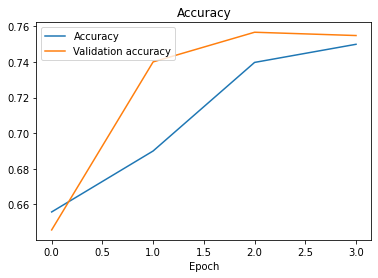|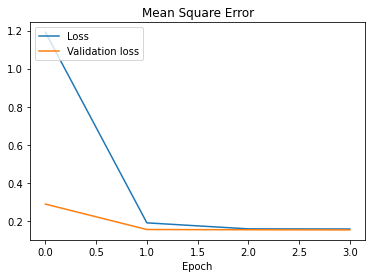|

```
# Using a big number of neurons in the hidden layer (>> input layer)
```

Next we ran our larger model (256-128-64-32-1) which achieved a test accuracy of 95.82%. We can observe that after 75 epochs the validation loss stops to decrease, i.e. our model is overfitting.


|Acc|MSE|
|-|-|
|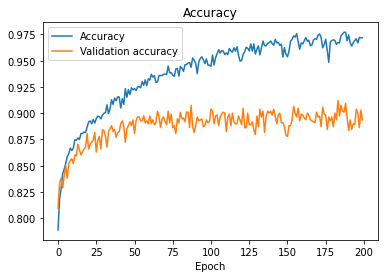|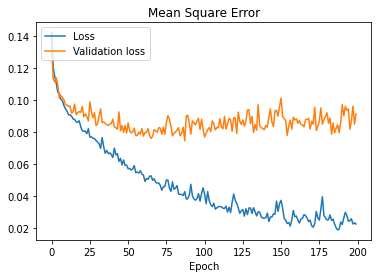|


```
#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------
```

### <font color="#CA3532">Optimize the network design</font>

- Change the network arquitecture, introducing more layers and neurons to obtain a better result. You can:
 - Add more and different type of layers
 - Change the activation funcions
 - Change the loss / optimizer
 - Change your initialization




Epoch 1/10000
136/136 [==============================] - 1s 6ms/step - loss: 0.1592 - accuracy: 0.7622 - val_loss: 0.1481 - val_accuracy: 0.7780
Epoch 2/10000
136/136 [==============================] - 1s 5ms/step - loss: 0.1439 - accuracy: 0.7805 - val_loss: 0.1352 - val_accuracy: 0.7983
Epoch 3/10000
136/136 [==============================] - 1s 5ms/step - loss: 0.1355 - accuracy: 0.7981 - val_loss: 0.1256 - val_accuracy: 0.8094
Epoch 4/10000
136/136 [==============================] - 1s 5ms/step - loss: 0.1258 - accuracy: 0.8108 - val_loss: 0.1183 - val_accuracy: 0.8150
Epoch 5/10000
136/136 [==============================] - 1s 4ms/step - loss: 0.1187 - accuracy: 0.8242 - val_loss: 0.1133 - val_accuracy: 0.8289
Epoch 6/10000
136/136 [==============================] - 1s 4ms/step - loss: 0.1142 - accuracy: 0.8351 - val_loss: 0.1124 - val_accuracy: 0.8344
Epoch 7/10000
136/136 [==============================] - 1s 5ms/step - loss: 0.1097 - accuracy: 0.8420 - val_loss: 0.1103 - val_ac

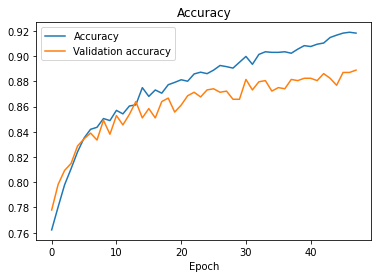

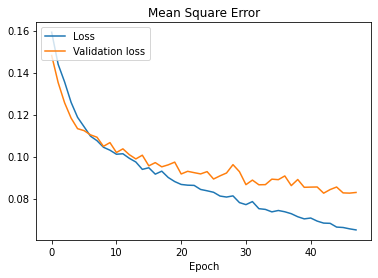

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 256)               1536      
                                                                 
 dense_30 (Dense)            (None, 64)                16448     
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,097
Trainable params: 20,097
Non-trainable params: 0
_________________________________________________________________



169/169 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9173
Accuracy: 91.73


In [ ]:
# Define the model using keras
nn = Sequential()

#-------------------------------------------------------------------------------
# TO-DO block: Include your code below
#-------------------------------------------------------------------------------


act_fn = "tanh"

nn.add(tf.keras.Input(shape=(x_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))


es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

nn.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])

#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

# Fit
history = nn.fit(x, y, epochs=10000, validation_split=0.2, callbacks=[es])

# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# <font color="#CA3532">SESSION 2</font>


### <font color="#CA3532">Dataset input</font>


In [ ]:
# Load here your selected dataset considering input and output dimensions
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
dataset = np.loadtxt(dataset_url, delimiter=',')

x = dataset[:, 0:5]
y = dataset[:, -1]
input_size = x.shape[1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

print("Label 1:", np.mean(y))
print("train:", np.mean(y_train))
print("test:", np.mean(y_test))

(4323, 5)
(4323,)
(1081, 5)
(1081,)
Label 1: 0.2934863064396743
train: 0.29354614850798055
test: 0.29324699352451433


### <font color="#CA3532">Standar choice</font>

- Evaluate the training with a standard choice of cost and activation functions, learning rate, weight initialization and network topology.
- Generate the loss and accuracy figures

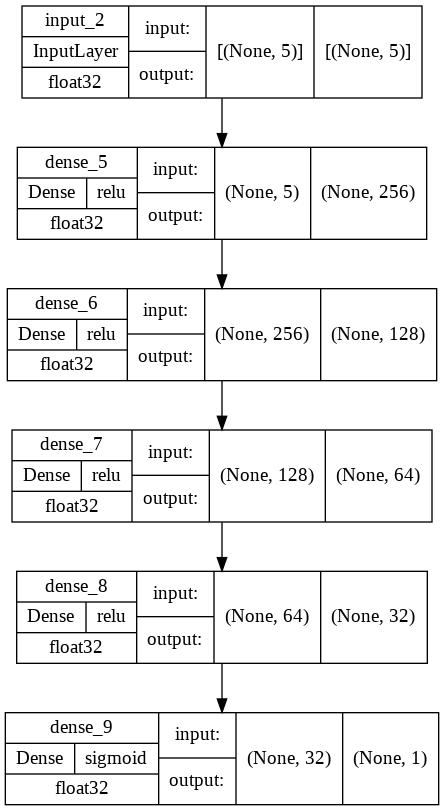

In [ ]:
nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

tf.keras.utils.plot_model(
    nn, 
    show_layer_activations=True, 
    show_shapes=True,
    show_dtype=True)

In [ ]:
nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.1)

Epoch 1/400
122/122 [==============================] - 4s 6ms/step - loss: 0.1534 - accuracy: 0.7699 - val_loss: 0.1273 - val_accuracy: 0.8037
Epoch 2/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1240 - accuracy: 0.8154 - val_loss: 0.1147 - val_accuracy: 0.8152
Epoch 3/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1165 - accuracy: 0.8306 - val_loss: 0.1125 - val_accuracy: 0.8106
Epoch 4/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1123 - accuracy: 0.8388 - val_loss: 0.1131 - val_accuracy: 0.8314
Epoch 5/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1087 - accuracy: 0.8434 - val_loss: 0.1100 - val_accuracy: 0.8314
Epoch 6/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1053 - accuracy: 0.8532 - val_loss: 0.1088 - val_accuracy: 0.8314
Epoch 7/400
122/122 [==============================] - 0s 4ms/step - loss: 0.1037 - accuracy: 0.8522 - val_loss: 0.1051 - val_accuracy: 0.8222

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


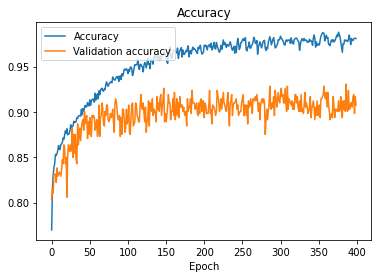

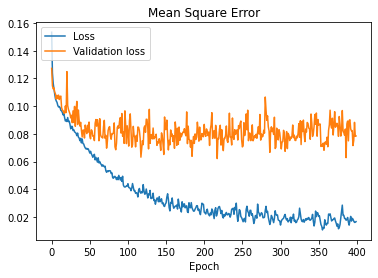

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               1536      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 3ms

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

### <font color="#CA3532">Optimizations</font>

- Evaluate each of the following optimization methods using the same representation and the duration of the training in terms of epochs to reach a choice of error and also in terms of time taken.

 a) Regularization

 b) Dropout

 c) Stochastic gradient descent

 d) Momentum  (including Nesterov version)

 e) AdaGrad

 f) RMSProp

 g) Adam

 h) Optimize

#### Regularization

In [ ]:
# a) Regularization 
nn = Sequential()

act_fn = "relu"

kr=0.0001
nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn,kernel_regularizer=regularizers.L1(kr)))
nn.add(tf.keras.layers.Dense(128, activation=act_fn,kernel_regularizer=regularizers.L1(kr)))
nn.add(tf.keras.layers.Dense(64, activation=act_fn,kernel_regularizer=regularizers.L1(kr)))
nn.add(tf.keras.layers.Dense(32, activation=act_fn,kernel_regularizer=regularizers.L1(kr)))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.1)


Epoch 1/400
122/122 [==============================] - 1s 6ms/step - loss: 0.3528 - accuracy: 0.7725 - val_loss: 0.2475 - val_accuracy: 0.8060
Epoch 2/400
122/122 [==============================] - 1s 4ms/step - loss: 0.2240 - accuracy: 0.7977 - val_loss: 0.1973 - val_accuracy: 0.7991
Epoch 3/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1921 - accuracy: 0.8062 - val_loss: 0.1753 - val_accuracy: 0.7991
Epoch 4/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1738 - accuracy: 0.8154 - val_loss: 0.1650 - val_accuracy: 0.7991
Epoch 5/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1626 - accuracy: 0.8231 - val_loss: 0.1587 - val_accuracy: 0.8176
Epoch 6/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1582 - accuracy: 0.8239 - val_loss: 0.1533 - val_accuracy: 0.7991
Epoch 7/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1510 - accuracy: 0.8257 - val_loss: 0.1488 - val_accuracy: 0.8083

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


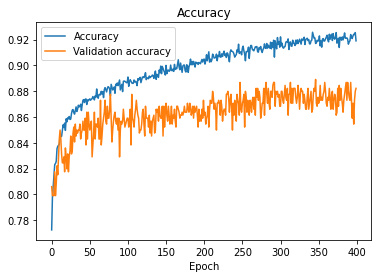

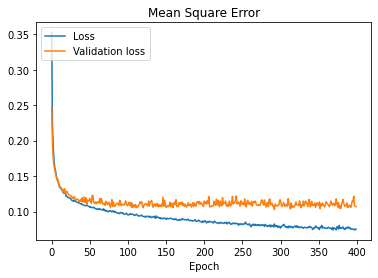

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               1536      
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 3ms

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

#### Dropout

In [ ]:
# b) Dropout

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dropout(0.1))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dropout(0.1))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dropout(0.1))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.1)


Epoch 1/400
122/122 [==============================] - 1s 6ms/step - loss: 0.1529 - accuracy: 0.7681 - val_loss: 0.1290 - val_accuracy: 0.8083
Epoch 2/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1304 - accuracy: 0.8067 - val_loss: 0.1227 - val_accuracy: 0.7991
Epoch 3/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1200 - accuracy: 0.8242 - val_loss: 0.1128 - val_accuracy: 0.8245
Epoch 4/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1157 - accuracy: 0.8283 - val_loss: 0.1115 - val_accuracy: 0.8176
Epoch 5/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1155 - accuracy: 0.8316 - val_loss: 0.1139 - val_accuracy: 0.8291
Epoch 6/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1093 - accuracy: 0.8437 - val_loss: 0.1110 - val_accuracy: 0.8383
Epoch 7/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1099 - accuracy: 0.8396 - val_loss: 0.1109 - val_accuracy: 0.8268

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


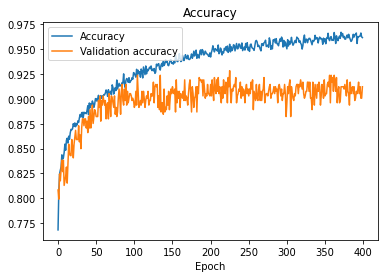

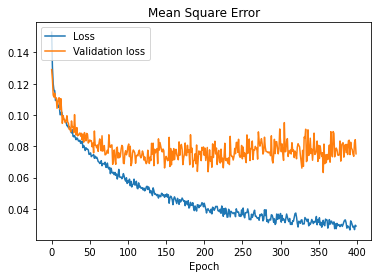

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               1536      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)               

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

#### SGD

In [ ]:
# c) Stochastic gradient descent

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD"), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.1)


Epoch 1/400
122/122 [==============================] - 1s 5ms/step - loss: 0.2527 - accuracy: 0.3941 - val_loss: 0.2499 - val_accuracy: 0.5658
Epoch 2/400
122/122 [==============================] - 0s 4ms/step - loss: 0.2470 - accuracy: 0.6596 - val_loss: 0.2443 - val_accuracy: 0.7021
Epoch 3/400
122/122 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.7021 - val_loss: 0.2396 - val_accuracy: 0.7275
Epoch 4/400
122/122 [==============================] - 0s 4ms/step - loss: 0.2385 - accuracy: 0.7044 - val_loss: 0.2355 - val_accuracy: 0.7275
Epoch 5/400
122/122 [==============================] - 0s 4ms/step - loss: 0.2352 - accuracy: 0.7041 - val_loss: 0.2319 - val_accuracy: 0.7275
Epoch 6/400
122/122 [==============================] - 1s 4ms/step - loss: 0.2322 - accuracy: 0.7041 - val_loss: 0.2287 - val_accuracy: 0.7275
Epoch 7/400
122/122 [==============================] - 1s 4ms/step - loss: 0.2295 - accuracy: 0.7041 - val_loss: 0.2258 - val_accuracy: 0.7275

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


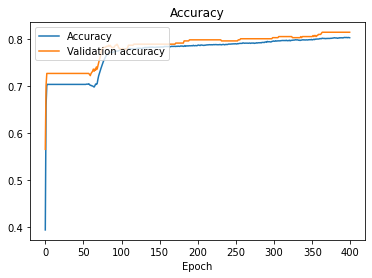

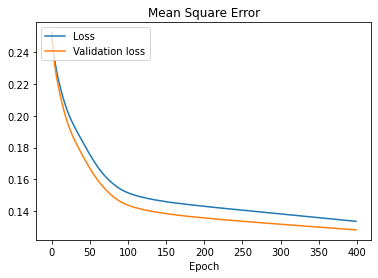

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 256)               1536      
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 3ms

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

#### Momentum

In [ ]:
# d) Momentum  (including Nesterov version)

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=True, name="SGD"), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.1)


Epoch 1/400
122/122 [==============================] - 1s 6ms/step - loss: 0.2405 - accuracy: 0.7031 - val_loss: 0.2360 - val_accuracy: 0.7275
Epoch 2/400
122/122 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.7041 - val_loss: 0.2306 - val_accuracy: 0.7275
Epoch 3/400
122/122 [==============================] - 0s 4ms/step - loss: 0.2306 - accuracy: 0.7041 - val_loss: 0.2254 - val_accuracy: 0.7275
Epoch 4/400
122/122 [==============================] - 1s 4ms/step - loss: 0.2260 - accuracy: 0.7041 - val_loss: 0.2202 - val_accuracy: 0.7275
Epoch 5/400
122/122 [==============================] - 0s 4ms/step - loss: 0.2214 - accuracy: 0.7041 - val_loss: 0.2149 - val_accuracy: 0.7275
Epoch 6/400
122/122 [==============================] - 0s 4ms/step - loss: 0.2169 - accuracy: 0.7041 - val_loss: 0.2099 - val_accuracy: 0.7275
Epoch 7/400
122/122 [==============================] - 1s 4ms/step - loss: 0.2126 - accuracy: 0.7041 - val_loss: 0.2052 - val_accuracy: 0.7275

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


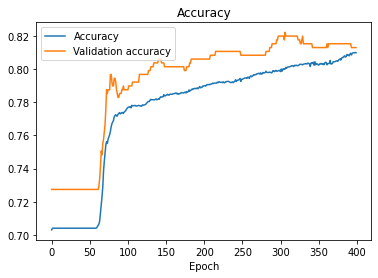

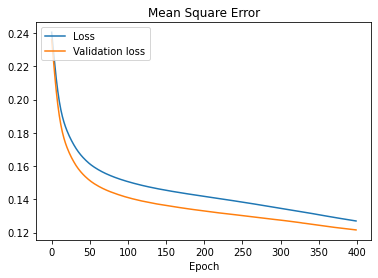

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               1536      
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 3ms

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

#### AdaGrad

In [ ]:
# e) AdaGrad

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0, epsilon=1e-7, name="Adagrad"), 
           loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.1)

Epoch 1/400
122/122 [==============================] - 1s 6ms/step - loss: 0.1645 - accuracy: 0.7450 - val_loss: 0.1377 - val_accuracy: 0.8060
Epoch 2/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1426 - accuracy: 0.7900 - val_loss: 0.1319 - val_accuracy: 0.8106
Epoch 3/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1380 - accuracy: 0.7992 - val_loss: 0.1286 - val_accuracy: 0.8106
Epoch 4/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1348 - accuracy: 0.8028 - val_loss: 0.1265 - val_accuracy: 0.8199
Epoch 5/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1320 - accuracy: 0.8075 - val_loss: 0.1243 - val_accuracy: 0.8199
Epoch 6/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1297 - accuracy: 0.8093 - val_loss: 0.1232 - val_accuracy: 0.8106
Epoch 7/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1277 - accuracy: 0.8100 - val_loss: 0.1215 - val_accuracy: 0.8083

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


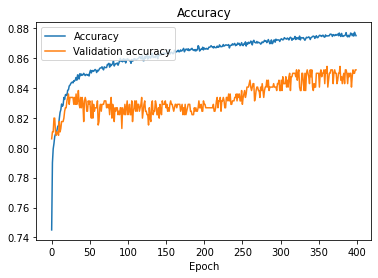

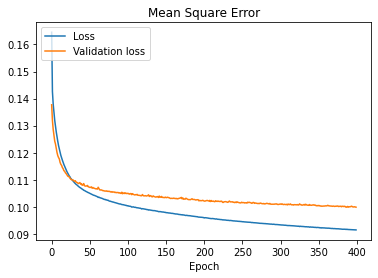

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 256)               1536      
                                                                 
 dense_51 (Dense)            (None, 128)               32896     
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 dense_54 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 3m

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

#### RMSProp

In [ ]:
# f) RMSProp

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0, rho=0.9, epsilon=1e-7, centered=False, name="RMSProp"),
           loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.1)

Epoch 1/400
122/122 [==============================] - 2s 6ms/step - loss: 0.1489 - accuracy: 0.7864 - val_loss: 0.1411 - val_accuracy: 0.7829
Epoch 2/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1246 - accuracy: 0.8147 - val_loss: 0.1145 - val_accuracy: 0.8360
Epoch 3/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1159 - accuracy: 0.8339 - val_loss: 0.1108 - val_accuracy: 0.8222
Epoch 4/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1125 - accuracy: 0.8357 - val_loss: 0.1145 - val_accuracy: 0.8199
Epoch 5/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1094 - accuracy: 0.8396 - val_loss: 0.1087 - val_accuracy: 0.8522
Epoch 6/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1078 - accuracy: 0.8455 - val_loss: 0.1054 - val_accuracy: 0.8245
Epoch 7/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1070 - accuracy: 0.8437 - val_loss: 0.1109 - val_accuracy: 0.8222

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


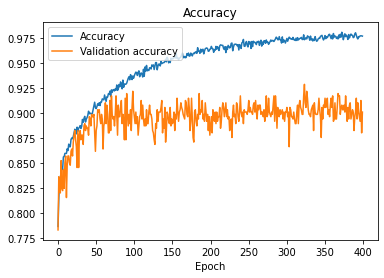

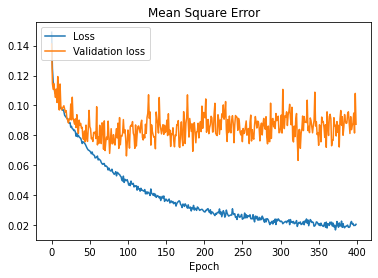

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 256)               1536      
                                                                 
 dense_56 (Dense)            (None, 128)               32896     
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 3m

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

#### Adam

In [ ]:
# g) Adam

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-7, amsgrad=False, name="Adam"),
           loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.1)

Epoch 1/400
122/122 [==============================] - 1s 6ms/step - loss: 0.1504 - accuracy: 0.7643 - val_loss: 0.1249 - val_accuracy: 0.8129
Epoch 2/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1278 - accuracy: 0.8105 - val_loss: 0.1165 - val_accuracy: 0.8106
Epoch 3/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1165 - accuracy: 0.8301 - val_loss: 0.1101 - val_accuracy: 0.8222
Epoch 4/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1123 - accuracy: 0.8368 - val_loss: 0.1089 - val_accuracy: 0.8314
Epoch 5/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1080 - accuracy: 0.8429 - val_loss: 0.1091 - val_accuracy: 0.8268
Epoch 6/400
122/122 [==============================] - 1s 5ms/step - loss: 0.1058 - accuracy: 0.8506 - val_loss: 0.1092 - val_accuracy: 0.8129
Epoch 7/400
122/122 [==============================] - 1s 4ms/step - loss: 0.1039 - accuracy: 0.8553 - val_loss: 0.1072 - val_accuracy: 0.8245

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


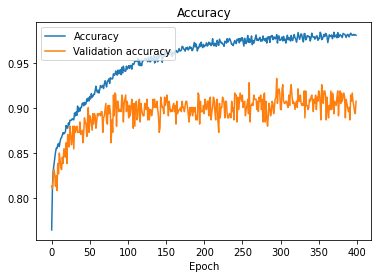

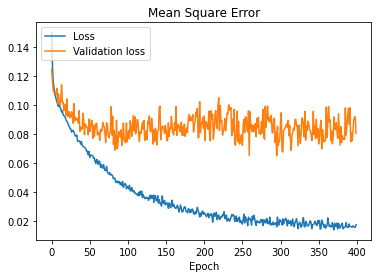

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 256)               1536      
                                                                 
 dense_61 (Dense)            (None, 128)               32896     
                                                                 
 dense_62 (Dense)            (None, 64)                8256      
                                                                 
 dense_63 (Dense)            (None, 32)                2080      
                                                                 
 dense_64 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 3m

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

#### Optimize

In [ ]:
#  h) Optimize

In [ ]:
nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-7, amsgrad=False, name="Adam"),
           loss="mse", metrics=["accuracy"])

class_weight = {
    0: np.mean(y),
    1: 1 - np.mean(y)
}

# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.1, class_weight=class_weight)

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

### <font color="#CA3532">Implement parallelization in Keras with the best optimization</font>






*   Run tests for GPU presence

*   Use your best implementation from the previous exercise here and compare the training time both with GPUs and without GPUs.

Comment all your results.





In [ ]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [ ]:
nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=100,
    restore_best_weights=True
)

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss="mse", metrics=["accuracy"])

t = time()
# Fit
history = nn.fit(x_train, y_train, epochs=400, validation_split=0.2)
print(time() - t)

Epoch 1/400
109/109 [==============================] - 2s 11ms/step - loss: 0.1503 - accuracy: 0.7721 - val_loss: 0.1249 - val_accuracy: 0.8046
Epoch 2/400
109/109 [==============================] - 1s 10ms/step - loss: 0.1236 - accuracy: 0.8109 - val_loss: 0.1154 - val_accuracy: 0.8277
Epoch 3/400
109/109 [==============================] - 1s 6ms/step - loss: 0.1149 - accuracy: 0.8323 - val_loss: 0.1162 - val_accuracy: 0.8220
Epoch 4/400
109/109 [==============================] - 1s 6ms/step - loss: 0.1128 - accuracy: 0.8415 - val_loss: 0.1141 - val_accuracy: 0.8197
Epoch 5/400
109/109 [==============================] - 1s 6ms/step - loss: 0.1080 - accuracy: 0.8453 - val_loss: 0.1109 - val_accuracy: 0.8324
Epoch 6/400
109/109 [==============================] - 1s 5ms/step - loss: 0.1064 - accuracy: 0.8479 - val_loss: 0.1067 - val_accuracy: 0.8382
Epoch 7/400
109/109 [==============================] - 1s 5ms/step - loss: 0.1059 - accuracy: 0.8482 - val_loss: 0.1108 - val_accuracy: 0.83

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


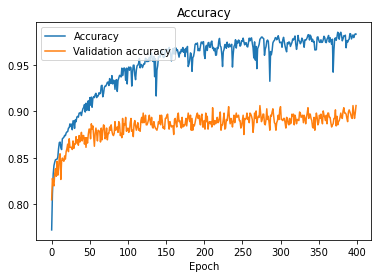

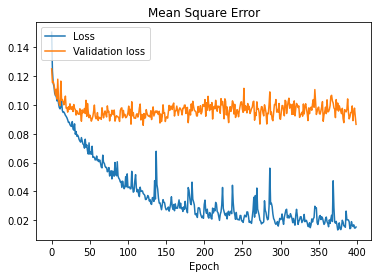

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               1536      
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 4ms

In [ ]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

### <font color="#CA3532">Convolutional Neural Networks</font>




Implement a convolutional neural network and apply it to classify the images of the CIFAR-10 dataset. The network should have at least the following characteristics:

    Convolutional layers.
    Pooling layers.
    Some regularization mechanism, such as dropout or L2 regularization.
    Batch normalization layers.

The network should obtain at least 75% accuracy on the test set.
